 Change in focal plane from normal of -20.39922377014136um with a VCA movement of 0.235mm = 47.0 counts


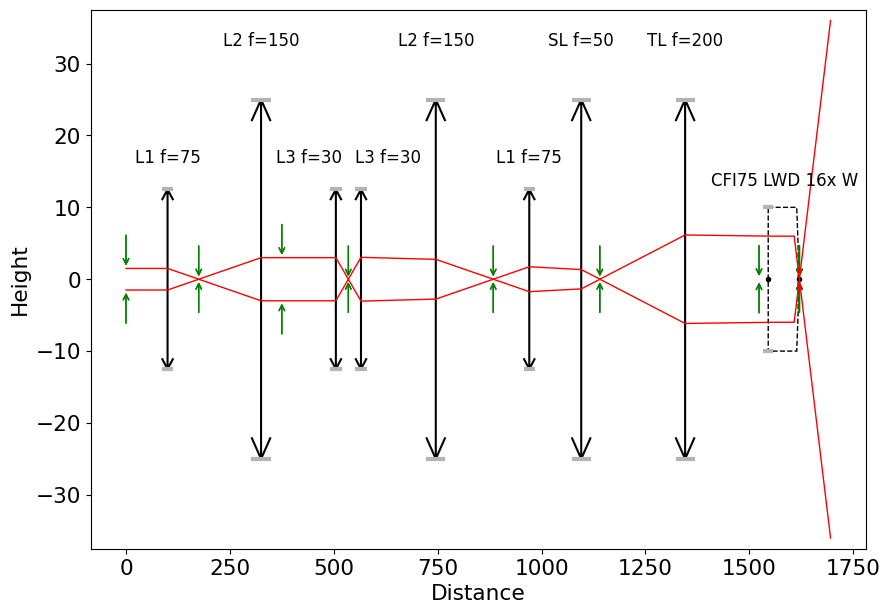

In [6]:
from raytracing import *
from raytracing import nikon

L1=75
L2=150
L3=30


VCA_D=0.235 #mm
D=VCA_D*2

counts=(VCA_D*1000)/5

SL=50
TL=200 

path = LaserPath()
path.append(Space(d=100))

#voice coil path times to to simulate the VCA mirror moving away from the focal point of L3
path.append(Lens(f=L1, diameter=25, label="L1 f="+str(L1)))
path.append(Space(d=L1+L2))
path.append(Lens(f=L2, diameter=50, label="L2 f="+str(L2)))
path.append(Space(d=L2+L3))
path.append(Lens(f=L3, diameter=25, label="L3 f="+str(L3)))
path.append(Space(d=L3+ L3 + D))

path.append(Lens(f=L3, diameter=25, label="L3 f="+str(L3)))
path.append(Space(d=L3+L2))
path.append(Lens(f=L2, diameter=50, label="L2 f="+str(L2)))
path.append(Space(d=L1+L2))
path.append(Lens(f=L1, diameter=25, label="L1 f="+str(L1)))
path.append(Space(d=L1+SL))

#Scan and Tube lens
path.append(Lens(f=SL, diameter=50, label="SL f="+str(SL)))
path.append(Space(d=SL+TL))
path.append(Lens(f=TL, diameter=50, label="TL f="+str(TL)))
path.append(Space(d=TL))

#Objective
path.append(nikon.LWD16X())            
path.append(Space(d=75))

# Trace Gaussian beam and print waist position
outputBeam = path.traceThrough(GaussianBeam(w=4, wavelength=920e-6))
DistanceFromFocus=((outputBeam.waistPosition)+75)*1000
print(f" Change in focal plane from normal of {DistanceFromFocus}um with a VCA movement of {VCA_D}mm = {counts} counts")

# Plot path 
path.display(beams=[GaussianBeam(w=1.5)])

In [21]:
#Some code to calculate the distance the VCA has to travel 
#with the input of change in focal plane

Focalplane_difference=15 #um

VCA_D=Focalplane_difference/63.83
counts=counts=(VCA_D*1000)/5
print(F"VoiceCoil movement= {VCA_D}mm, counts is {counts}")


VoiceCoil movement= 0.23499921666927778mm, counts is 46.99984333385556


In [ ]:
# incorporate refractive index mismatch
